In [1]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.stats
from scipy import linalg


import mixture
from mixture import GaussianMixture as GMM
from mixture import BayesianGaussianMixture as BGMM


In [2]:

import os
import sys

data = np.load('./data_itr20.pkl')

X = data.reshape(data.shape[0]*data.shape[1], data.shape[2])
N, T = data.shape[:2]


In [3]:
import itertools
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold', 'darkorange'])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.3)
        splot.add_artist(ell)

    plt.title(title)



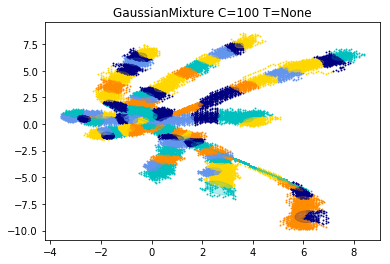

/Users/ajabri/clones/mixture/mixture/k_means_.py:955: ConvergenceWarning: Number of distinct clusters (55) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return_n_iter=True, group=self.group)


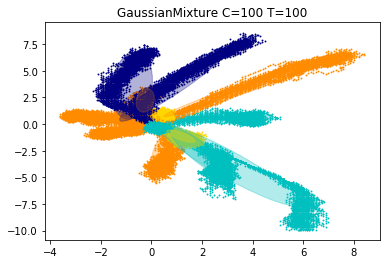

/Users/ajabri/clones/mixture/mixture/base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


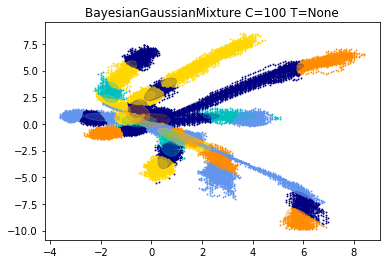

/Users/ajabri/clones/mixture/mixture/k_means_.py:955: ConvergenceWarning: Number of distinct clusters (44) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return_n_iter=True, group=self.group)
/Users/ajabri/clones/mixture/mixture/base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


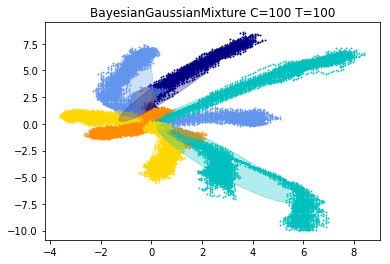

In [4]:

def cluster(mix_type, group=None, C=20):
    mix = getattr(mixture, mix_type)(n_components=C, group=group, covariance_type='full').fit(X)
    plot_results(X, mix.predict(X), mix.means_, mix.covariances_, 0,
                 '%s C=%s T=%s' % (mix_type, C, group))
    plt.show()

C=100
cluster('GaussianMixture', C=C)
cluster('GaussianMixture', C=C, group=T)
cluster('BayesianGaussianMixture', C=C)
cluster('BayesianGaussianMixture', C=C, group=T)


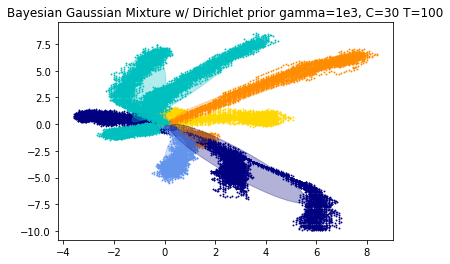

[  4.17549458e-02   1.24999953e-08   5.14392710e-03   1.24999953e-08
   9.38414624e-02   9.97208612e-02   2.41103879e-02   1.24999953e-08
   5.05308485e-02   1.24999953e-08   1.49693491e-01   1.46762995e-01
   5.06463390e-02   9.43234187e-02   5.30775968e-02   1.24999953e-08
   6.78345557e-02   1.24999953e-08   1.24999953e-08   1.24999953e-08
   4.39185292e-02   6.78932970e-02   1.24999953e-08   1.24999953e-08
   1.24999953e-08   1.24999953e-08   1.24999953e-08   1.07471573e-02
   1.24999953e-08   1.24999953e-08]
2.49897078949


In [36]:
# Experiment with dirichlet process prior gamma
C=30
dpgmm = BGMM(n_components=C, weight_concentration_prior=1e-3, weight_concentration_prior_type='dirichlet_distribution',
                                        covariance_type='full',
                                        group=T).fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 2,
             'Bayesian Gaussian Mixture w/ Dirichlet prior gamma=1e3, C=30 T=100')
plt.show()

print(dpgmm.weights_)
print(scipy.stats.entropy(dpgmm.weights_))